<font size=5 color='red'>第4章  数据预处理</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

【例4-1】利用isnull检测缺失值。

In [2]:
import pandas as pd
import numpy as np
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
print(string_data)
string_data.isnull()


0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object


0    False
1    False
2     True
3    False
dtype: bool

【例4-2】Series中的None值处理。

In [3]:
string_data = pd.Series(['aardvark', 'artichoke',np.nan, 'avocado'])
string_data.isnull()


0    False
1    False
2     True
3    False
dtype: bool

【例4-3】利用isnull().sum()统计缺失值。

In [4]:
df = pd.DataFrame(np.arange(12).reshape(3,4),columns = ['A','B','C','D'])
df.ix[2,:] = np.nan
df[3] = np.nan
print(df)
df.isnull().sum()


     A    B    C    D   3
0  0.0  1.0  2.0  3.0 NaN
1  4.0  5.0  6.0  7.0 NaN
2  NaN  NaN  NaN  NaN NaN


A    1
B    1
C    1
D    1
3    3
dtype: int64

【例4-4】用info方法查看DataFrame的缺失值。

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
A    2 non-null float64
B    2 non-null float64
C    2 non-null float64
D    2 non-null float64
3    0 non-null float64
dtypes: float64(5)
memory usage: 248.0 bytes


【例4-5】Series的dropna用法。

In [6]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
print(data)
print(data.dropna())


0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64
0    1.0
2    3.5
4    7.0
dtype: float64


【例4-6】布尔型索引选择过滤非缺失值。

In [7]:
not_null = data.notnull()
print(not_null)
print(data[not_null])


0     True
1    False
2     True
3    False
4     True
dtype: bool
0    1.0
2    3.5
4    7.0
dtype: float64


【例4-7】DataFrame对象的dropna默认参数使用。

In [8]:
from numpy import nan as NA
data = pd.DataFrame([[1., 5.5, 3.], [1., NA, NA],[NA, NA, NA], 
[NA, 5.5, 3.]])
print(data)
cleaned = data.dropna()
print('删除缺失值后的：\n',cleaned)


     0    1    2
0  1.0  5.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  5.5  3.0
删除缺失值后的：
      0    1    2
0  1.0  5.5  3.0


【例4-8】传入参数all。

In [9]:
data = pd.DataFrame([[1., 5.5, 3.], [1., NA, NA],[NA, NA, NA], 
[NA, 5.5, 3.]])
print(data)
data.dropna(how='all')


     0    1    2
0  1.0  5.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  5.5  3.0


,0,1,2
0,1.0,5.5,3.0
1,1.0,NaN,NaN
3,NaN,5.5,3.0


【例4-9】dropna中的axis参数应用。

In [10]:
data = pd.DataFrame([[1., 5.5, NA], [1., NA, NA],[NA, NA, NA], [NA, 5.5, NA]])
print(data)
data.dropna(axis = 1, how = 'all')


     0    1   2
0  1.0  5.5 NaN
1  1.0  NaN NaN
2  NaN  NaN NaN
3  NaN  5.5 NaN


,0,1
0,1.0,5.5
1,1.0,NaN
2,NaN,NaN
3,NaN,5.5


【例4-10】dropna中的thresh参数应用。

In [11]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
print(df)
df.dropna(thresh=2)


          0         1         2
0  0.428531       NaN       NaN
1  0.216198       NaN       NaN
2 -0.844204       NaN  1.724425
3 -1.518768       NaN  2.015263
4  0.204760  0.045072 -0.376766
5  2.197613  0.013804  0.871174
6  1.356719 -0.869661 -1.230816


,0,1,2
2,-0.844204,NaN,1.724425
3,-1.518768,NaN,2.015263
4,0.204760,0.045072,-0.376766
5,2.197613,0.013804,0.871174
6,1.356719,-0.869661,-1.230816


【例4-11】通过字典形式填充缺失值。

In [12]:
df = pd.DataFrame(np.random.randn(5,3))
df.loc[:3,1] = NA
df.loc[:2,2] = NA
print(df)
df.fillna({1:0.88,2:0.66})


          0         1         2
0  0.179252       NaN       NaN
1 -0.454944       NaN       NaN
2 -1.134563       NaN       NaN
3  0.681449       NaN  0.796178
4  1.086857  0.873304  0.021639


,0,1,2
0,0.179252,0.880000,0.660000
1,-0.454944,0.880000,0.660000
2,-1.134563,0.880000,0.660000
3,0.681449,0.880000,0.796178
4,1.086857,0.873304,0.021639


【例4-12】fillna中method的应用。

In [13]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
print(df)
df.fillna(method = 'ffill')


          0         1         2
0  0.585528 -2.029730  0.895578
1  2.875900 -0.333161  0.267442
2  0.630086       NaN -1.180524
3 -2.142968       NaN  1.318543
4 -0.978814       NaN       NaN
5  0.154871       NaN       NaN


,0,1,2
0,0.585528,-2.029730,0.895578
1,2.875900,-0.333161,0.267442
2,0.630086,-0.333161,-1.180524
3,-2.142968,-0.333161,1.318543
4,-0.978814,-0.333161,1.318543
5,0.154871,-0.333161,1.318543


【例4-13】用Series的均值填充。

In [14]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())


0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

【例4-14】DataFrame中用均值填充。

In [15]:
df = pd.DataFrame(np.random.randn(4, 3))
df.iloc[2:, 1] = NA
df.iloc[3:, 2] = NA
print(df)
df[1] = df[1].fillna(df[1].mean())
print(df)


          0         1         2
0  0.498853  1.010848  0.006730
1  0.178002  1.669683  0.219512
2  0.573039       NaN  1.386017
3 -1.418103       NaN       NaN
          0         1         2
0  0.498853  1.010848  0.006730
1  0.178002  1.669683  0.219512
2  0.573039  1.340266  1.386017
3 -1.418103  1.340266       NaN


【例4-15】replace替换数据值。

In [16]:
data = {'姓名':['张三','小明','马芳','国志'],'性别':['0','1','0','1'],
'籍贯':['北京','甘肃','','上海']}
df = pd.DataFrame(data)
df = df.replace('','不详')
print(df)


   姓名 性别  籍贯
0  张三  0  北京
1  小明  1  甘肃
2  马芳  0  不详
3  国志  1  上海


【例4-16】replace传入列表实现多值替换。

In [17]:
df = df.replace(['不详','甘肃'],['兰州','兰州'])
print(df)


   姓名 性别  籍贯
0  张三  0  北京
1  小明  1  兰州
2  马芳  0  兰州
3  国志  1  上海


【例4-17】 replace传入字典实现多值替换。

In [18]:
df = df.replace({'1':'男','0':'女'})
print(df)


   姓名 性别  籍贯
0  张三  女  北京
1  小明  男  兰州
2  马芳  女  兰州
3  国志  男  上海


【例4-18】map方法映射数据。

In [19]:
data = {'姓名':['张三','小明','马芳','国志'],'性别':['0','1','0','1'],
'籍贯':['北京','兰州','兰州','上海']}
df = pd.DataFrame(data)
df['成绩'] = [58,86,91,78]
print(df)
def grade(x):
    if x>=90:
        return '优'
    elif 70<=x<90:
        return '良'
    elif 60<=x<70:
        return '中'
    else:
        return '差'
df['等级'] = df['成绩'].map(grade)
print(df)


   姓名 性别  籍贯  成绩
0  张三  0  北京  58
1  小明  1  兰州  86
2  马芳  0  兰州  91
3  国志  1  上海  78
   姓名 性别  籍贯  成绩 等级
0  张三  0  北京  58  差
1  小明  1  兰州  86  良
2  马芳  0  兰州  91  优
3  国志  1  上海  78  良


【例4-19】利用散点图检测异常值。

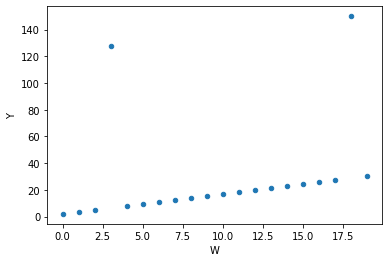

In [58]:
import pandas as pd

wdf = pd.DataFrame(np.arange(20),columns = ['W'])
wdf['Y'] = wdf['W']*1.5+2
wdf.iloc[3,1] = 128
wdf.iloc[18,1] = 150
wdf.plot(kind = 'scatter',x = 'W',y = 'Y')


【例4-20】利用箱线图分析异常值。

{'whiskers': [<matplotlib.lines.Line2D at 0x14d3bba6288>,
 'caps': [<matplotlib.lines.Line2D at 0x14d3bbb0288>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d3bba3ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x14d3bbaba08>],
 'fliers': [<matplotlib.lines.Line2D at 0x14d3bbd3cc8>],
 'means': []}

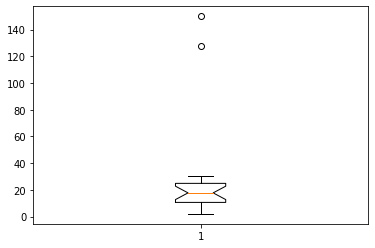

In [59]:
import matplotlib.pyplot as plt
plt.boxplot(wdf['Y'].values,notch = True)


【例4-21】利用3σ法则检测异常值。

In [22]:
def outRange(S):
    blidx = (S.mean()-3*S.std()>S)|(S.mean()+3*S.std()<S)
    idx = np.arange(S.shape[0])[blidx]
    outRange = S.iloc[idx]
    return outRange
outier = outRange(wdf['Y'])
outier	


18    150.0
Name: Y, dtype: float64

【例4-22】利用Python计算属性间的相关性。

In [23]:
import pandas as pd
import numpy as np
# a = [np.random.randint(0, 100) for a in range(20)]
# b = [random.randint(0, 100) for a in range(20)]
a=[47, 83, 81, 18, 72, 41, 50, 66, 47, 20, 96, 21, 16, 60, 37, 59, 22, 16, 32, 63]
b=[56, 96, 84, 21, 87, 67, 43, 64, 85, 67, 68, 64, 95, 58, 56, 75, 6, 11, 68, 63]
data=np.array([a, b]).T
dfab = pd.DataFrame(data, columns=['A', 'B'])
# display(dfab)
print('属性A和B的协方差：',dfab.A.cov(dfab.B))
print('属性A和B的相关系数：',dfab.A.corr(dfab.B))


属性A和B的协方差： 310.2157894736842
属性A和B的相关系数： 0.49924871046524394


【例4-23】merge的默认合并数据。

In [24]:
price = pd.DataFrame({'fruit':['apple','grape',
'orange','orange'],'price':[8,7,9,11]})
amount = pd.DataFrame({'fruit':['apple','grape',
'orange'],'amout':[5,11,8]})
display(price,amount,pd.merge(price,amount))


,fruit,price
0,apple,8
1,grape,7
2,orange,9
3,orange,11


,fruit,amout
0,apple,5
1,grape,11
2,orange,8


,fruit,price,amout
0,apple,8,5
1,grape,7,11
2,orange,9,8
3,orange,11,8


【例4-24】指定合并时的列名。

In [25]:
display(pd.merge(price,amount,left_on = 'fruit',right_on = 'fruit'))

,fruit,price,amout
0,apple,8,5
1,grape,7,11
2,orange,9,8
3,orange,11,8


【例4-25】左连接。

In [26]:
display(pd.merge(price,amount,how = 'left'))

,fruit,price,amout
0,apple,8,5
1,grape,7,11
2,orange,9,8
3,orange,11,8


【例4-26】右连接。

In [27]:
display(pd.merge(price,amount,how = 'right'))

,fruit,price,amout
0,apple,8,5
1,grape,7,11
2,orange,9,8
3,orange,11,8


【例4-27】merge通过多个键合并。

In [28]:
left = pd.DataFrame({'key1':['one','one','two'],
'key2':['a','b','a'],'value1':range(3)})
right = pd.DataFrame({'key1':['one','one','two','two'],
'key2':['a','a','a','b'],'value2':range(4)})
display(left,right,pd.merge(left,right,on = ['key1','key2'],how = 'left'))


,key1,key2,value1
0,one,a,0
1,one,b,1
2,two,a,2


,key1,key2,value2
0,one,a,0
1,one,a,1
2,two,a,2
3,two,b,3


,key1,key2,value1,value2
0,one,a,0,0.0
1,one,a,0,1.0
2,one,b,1,NaN
3,two,a,2,2.0


【例4-28】merge函数中参数suffixes的应用。

In [29]:
print(pd.merge(left,right,on = 'key1'))
print(pd.merge(left,right,on = 'key1',suffixes = ('_left','_right')))


  key1 key2_x  value1 key2_y  value2
0  one      a       0      a       0
1  one      a       0      a       1
2  one      b       1      a       0
3  one      b       1      a       1
4  two      a       2      a       2
5  two      a       2      b       3
  key1 key2_left  value1 key2_right  value2
0  one         a       0          a       0
1  one         a       0          a       1
2  one         b       1          a       0
3  one         b       1          a       1
4  two         a       2          a       2
5  two         a       2          b       3


【例4-29】两个Series的数据连接。

In [30]:
s1 = pd.Series([0,1],index = ['a','b'])
s2 = pd.Series([2,3,4],index = ['a','d','e'])
s3 = pd.Series([5,6],index = ['f','g'])
print(pd.concat([s1,s2,s3]))  #Series行合并


a    0
b    1
a    2
d    3
e    4
f    5
g    6
dtype: int64


【例4-30】两个DataFrame的数据连接。

In [31]:
data1 = pd.DataFrame(np.arange(6).reshape(2,3),columns = list('abc'))
data2 = pd.DataFrame(np.arange(20,26).reshape(2,3),columns = list('ayz'))
data = pd.concat([data1,data2],axis = 0)
display(data1,data2,data)


,a,b,c
0,0,1,2
1,3,4,5


,a,y,z
0,20,21,22
1,23,24,25


,a,b,c,y,z
0,0,1.0,2.0,NaN,NaN
1,3,4.0,5.0,NaN,NaN
0,20,NaN,NaN,21.0,22.0
1,23,NaN,NaN,24.0,25.0


【例4-31】指定索引顺序。

In [32]:
import pandas as pd
s1=pd.Series([0,1],index=['a','b'])
s2=pd.Series([2,3,4],index=['a','d','e'])
s3=pd.Series([5,6],index=['f','g'])
s4=pd.concat([s1*5,s3],sort=False)
s5=pd.concat([s1,s4],axis=1,sort=False)
s6=pd.concat([s1,s4],axis=1,join='inner',sort=False)
s7=pd.concat([s1,s4],axis=1,join='inner',join_axes=[['b','a']],sort=False)
display(s6,s7)


,0,1
a,0,0
b,1,5


,0,1
b,1,5
a,0,0


【例4-32】使用combine_first合并。

In [33]:
# w1.combine_first(w2)

【例4-33】数据的离差标准化。

In [34]:
def MinMaxScale(data):
    data = (data-data.min())/(data.max()-data.min())
    return data
x = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
print('原始数据为：\n',x)
x_scaled = MinMaxScale(x)
print('标准化后矩阵为:\n',x_scaled,end = '\n')


原始数据为：
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
标准化后矩阵为:
 [[0.66666667 0.         1.        ]
 [1.         0.33333333 0.33333333]
 [0.33333333 0.66666667 0.        ]]


【例4-34】数据的标准差标准化。
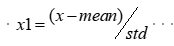

In [35]:
def StandardScale(data):
    data = (data-data.mean())/data.std()
    return data
x = np.array([[ 1., -1.,  2.],[ 2., 0., 0.],[ 0., 1., -1.]])
print('原始数据为：\n',x)
x_scaled = StandardScale(x)
print('标准化后矩阵为:\n',x_scaled,end = '\n')


原始数据为：
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
标准化后矩阵为:
 [[ 0.52128604 -1.35534369  1.4596009 ]
 [ 1.4596009  -0.41702883 -0.41702883]
 [-0.41702883  0.52128604 -1.35534369]]


【例4-35】将图像进行小波变换并显示。

In [36]:
# !pip install opencv-python

In [37]:
import cv2 as cv

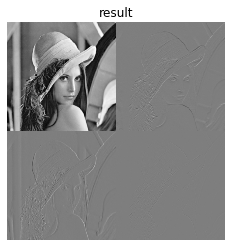

In [38]:
import numpy as np
import pywt
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("lena.jpg")
img = cv.resize(img, (448, 448))
# 将多通道图像变为单通道图像
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.float32)
plt.figure('二维小波一级变换')
coeffs = pywt.dwt2(img, 'haar')
cA, (cH, cV, cD) = coeffs
# 将各个子图进行拼接，最后得到一张图
AH = np.concatenate([cA, cH+255], axis=1)
VD = np.concatenate([cV+255, cD+255], axis=1)
img = np.concatenate([AH, VD], axis=0)
# 显示为灰度图
plt.axis('off')
plt.imshow(img,'gray')
plt.title('result')
plt.show()


【例4-36】sklearn实现鸢尾花数据降维，将原来4维的数据降维为2维。

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

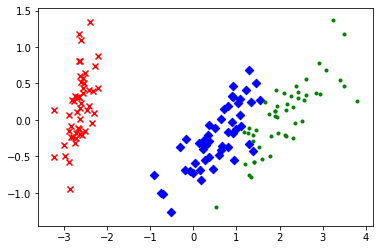

In [39]:
import matplotlib.pyplot as plt                 
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
data = load_iris()
y = data.target
x = data.data
pca = PCA(n_components = 2)     
#加载PCA算法，设置降维后主成分数目为2
reduced_x = pca.fit_transform(x)   #对样本进行降维
print(reduced_x)
#在平面中画出降维后的样本点的分布
red_x,red_y = [],[]
blue_x,blue_y = [],[]
green_x,green_y = [],[]
for i in range(len(reduced_x)):
    if y[i] ==0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif y[i]==1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
    else:
        green_x.append(reduced_x[i][0])
        green_y.append(reduced_x[i][1])
plt.scatter(red_x,red_y,c='r',marker='x')
plt.scatter(blue_x,blue_y,c='b',marker='D')
plt.scatter(green_x,green_y,c='g',marker='.')
plt.show()


【例4-37】数据规范化示例。

In [40]:
import pandas as pd
import numpy as np
a=[47, 83, 81, 18, 72, 41]
b=[56, 96, 84, 21, 87, 67]
data=np.array([a, b]).T
dfab = pd.DataFrame(data, columns=['A', 'B'])
print('最小-最大规范化:\n',(dfab- dfab.min())/(dfab.max()- dfab.min()))
print('零均值规范化：\n',(dfab- dfab.mean())/dfab.std())


最小-最大规范化:
           A         B
0  0.446154  0.466667
1  1.000000  1.000000
2  0.969231  0.840000
3  0.000000  0.000000
4  0.830769  0.880000
5  0.353846  0.613333
零均值规范化：
           A         B
0 -0.386103 -0.456223
1  1.003868  1.003690
2  0.926648  0.565716
3 -1.505803 -1.733646
4  0.579155  0.675209
5 -0.617765 -0.054747


【例4-38】数据的哑变量处理。

In [41]:
df = pd.DataFrame([  
            ['green', 'M', 10.1, 'class1'],   
            ['red', 'L', 13.5, 'class2'],   
            ['blue', 'XL', 14.3, 'class1']])  
df.columns = ['color', 'size', 'prize','class label']  
print(df)
pd.get_dummies(df)  


   color size  prize class label
0  green    M   10.1      class1
1    red    L   13.5      class2
2   blue   XL   14.3      class1


,prize,color_blue,color_green,color_red,size_L,size_M,size_XL,class label_class1,class label_class2
0,10.1,0,1,0,0,1,0,1,0
1,13.5,0,0,1,1,0,0,0,1
2,14.3,1,0,0,0,0,1,1,0


【例4-39】cut方法应用。

In [42]:
np.random.seed(666)
score_list = np.random.randint(25, 100, size = 10)
print('原始数据：\n',score_list)
bins = [0, 59, 70, 80, 100]
score_cut = pd.cut(score_list, bins)
print(pd.value_counts(score_cut)) 
# 统计每个区间人数


原始数据：
 [27 70 55 87 95 98 55 61 86 76]
(80, 100]    4
(0, 59]      3
(59, 70]     2
(70, 80]     1
dtype: int64


【例4-40】等频法离散化连续型数据。

In [43]:
def SameRateCut(data,k):
    k = 2
    w = data.quantile(np.arange(0,1+1.0/k,1.0/k))
    data = pd.cut(data,w)
    return data
result = SameRateCut(pd.Series(score_list),3)
result.value_counts()


(73.0, 98.0]    5
(27.0, 73.0]    4
dtype: int64

【例4-41】数据的标准化、方差和标准差求解示例

In [44]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -2.,  1.5],[ 2.2,  1.3, 0.5],[ 0.3,  1., -1.5]])
X_scaled = preprocessing.scale(X_train)
print('X_train:\n',X_train)
print('X_scaled:\n',X_scaled)
print('均值：',X_scaled.mean(axis=0))
print('单位方差：',X_scaled.std(axis=0))


X_train:
 [[ 1.  -2.   1.5]
 [ 2.2  1.3  0.5]
 [ 0.3  1.  -1.5]]
X_scaled:
 [[-0.21242964 -1.40942772  1.06904497]
 [ 1.31706379  0.80538727  0.26726124]
 [-1.10463415  0.60404045 -1.33630621]]
均值： [0. 0. 0.]
单位方差： [1. 1. 1.]


【例4-42】数据的标准化计算示例。

In [45]:
scaler = preprocessing.StandardScaler().fit(X_train)
print('scaler.scale_ :',scaler.scale_)
print('scaler.mean_ :',scaler.mean_)
scaler.transform(X_train)


scaler.scale_ : [0.78457349 1.48996644 1.24721913]
scaler.mean_ : [1.16666667 0.1        0.16666667]


array([[-0.21242964, -1.40942772,  1.06904497],
       [ 1.31706379,  0.80538727,  0.26726124],
       [-1.10463415,  0.60404045, -1.33630621]])

【例4-43】数据的缩放示例。

In [46]:
X_train = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
print('原数据：\n',X_train)
print('归一化：\n',X_train_minmax)


X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
print('测试数据：',X_test)
print('归一化的测试数据：\n',X_test_minmax)
print('',min_max_scaler.scale_)
print('',min_max_scaler.min_)


原数据：
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
归一化：
 [[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
测试数据： [[-3. -1.  4.]]
归一化的测试数据：
 [[-1.5         0.          1.66666667]]
 [0.5        0.5        0.33333333]
 [0.         0.5        0.33333333]


【例4-44】利用MaxAbsScaler将数据归一化。

In [47]:
X_train = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
max_Abs_scaler = preprocessing.MaxAbsScaler()
X_train_minmax = max_Abs_scaler.fit_transform(X_train)
print('原数据：\n',X_train)
print('归一化：\n',X_train_minmax)


X_test = np.array([[-3., -1.,  4.]])
X_test_maxAbs = max_Abs_scaler.transform(X_test)
print('测试数据：',X_test)
print('归一化的测试数据：',X_test_maxAbs)


原数据：
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
归一化：
 [[ 0.5 -1.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -0.5]]
测试数据： [[-3. -1.  4.]]
归一化的测试数据： [[-1.5 -1.   2. ]]


【例4-45】数据映射到值介于0和1之间的均匀分布

In [48]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)
print(np.percentile(X_train[:, 0], [0, 25, 50, 75, 100]) )
# 此特征对应于以厘米为单位的萼片长度。print(np.percentile(X_train_trans[:, 0], [0, 25, 50, 75, 100]))


[4.3 5.1 5.8 6.5 7.9]


【例4-46】使用Box-Cox将从对数正态分布绘制的样本映射到正态分布的示例。

In [49]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
X_lognormal = np.random.RandomState(616).lognormal(size=(3, 3))
print(X_lognormal)
T=pt.fit_transform(X_lognormal)
print(T)


[[1.28331718 1.18092228 0.84160269]
 [0.94293279 1.60960836 0.3879099 ]
 [1.35235668 0.21715673 1.09977091]]
[[ 0.49024349  0.17881995 -0.1563781 ]
 [-0.05102892  0.58863195 -0.57612414]
 [ 0.69420009 -0.84857822  0.10051454]]


【例4-47】使用QuantileTransformer方法进行数据映射。

In [50]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
X_trans = quantile_transformer.fit_transform(X)
quantile_transformer.quantiles_


array([[4.3, 2. , 1. , 0.1],
       [4.4, 2.2, 1.1, 0.1],
       [4.4, 2.2, 1.2, 0.1],
       [4.4, 2.2, 1.2, 0.1],
       [4.5, 2.3, 1.3, 0.1],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.4, 1.3, 0.2],
       [4.7, 2.4, 1.3, 0.2],
       [4.7, 2.4, 1.3, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [5. , 2.6, 1.4, 0.2],
       [5. , 2.6, 1.4, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5.1, 2.7, 1.5, 0.2],
       [5.1, 2.8, 1.5, 0.2],
       [5.1, 2

【例4-48】数据正态化示例

In [51]:
X = [[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')
X_normalized


array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

【例4-49】数据编码示例。

In [52]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari']])


array([[0., 1., 1.]])

【例5-50】使用OneHotEncoder进行分类特征编码示例。

In [53]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
R=enc.transform([['female', 'from US', 'uses Safari'],['male', 'from Europe', 'uses Safari']]).toarray()
display(R)


array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

【例4-51】类型数据变换示例，数据集中有两种性别，四个可能的大洲和四个网络浏览器。

In [54]:
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()


array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

【例4-52】：数据的K-桶离散化示例。

In [55]:
X = np.array([[ -3., 5., 15 ],[  0., 6., 14 ],[  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)
est.transform(X)


array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

【例4-53】数据的二值化示例。

In [56]:
X = [[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]]
binarizer = preprocessing.Binarizer().fit(X)  
Y1=binarizer.transform(X)
print(Y1)
# 可以调整阈值
binarizer = preprocessing.Binarizer(threshold=1.1)
Y2=binarizer.transform(X)
print(Y2)


[[1. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 0.]]
